### Data Preprocessing

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_trks = pd.read_csv('https://api.vitaldb.net/trks')
df_cases = pd.read_csv("https://api.vitaldb.net/cases")
df_labs = pd.read_csv('https://api.vitaldb.net/labs')

* df_trks chech

In [3]:
df_trks.head()

,caseid,tname,tid
0,1,BIS/BIS,fd869e25ba82a66cc95b38ed47110bf4f14bb368
1,1,BIS/EEG1_WAV,0aa685df768489a18a5e9f53af0d83bf60890c73
2,1,BIS/EEG2_WAV,ad13b2c39b19193c8ae4a2de4f8315f18d61a57e
3,1,BIS/EMG,2525603efe18d982764dbca457affe7a45e766a9
4,1,BIS/SEF,1c91aec859304840dec75acf4a35da78be0e8ef0


* If df_trks['tname'] == 'SNUADC/PLETH'

In [4]:
df_trks['tname'].unique() 

array(['BIS/BIS', 'BIS/EEG1_WAV', 'BIS/EEG2_WAV', 'BIS/EMG', 'BIS/SEF',
       'BIS/SQI', 'BIS/SR', 'BIS/TOTPOW', 'Primus/AWP', 'Primus/CO2',
       'Primus/COMPLIANCE', 'Primus/ETCO2', 'Primus/EXP_DES',
       'Primus/EXP_SEVO', 'Primus/FEN2O', 'Primus/FEO2', 'Primus/FIN2O',
       'Primus/FIO2', 'Primus/INCO2', 'Primus/INSP_DES',
       'Primus/INSP_SEVO', 'Primus/MAC', 'Primus/MAWP_MBAR', 'Primus/MV',
       'Primus/PAMB_MBAR', 'Primus/PEEP_MBAR', 'Primus/PIP_MBAR',
       'Primus/PPLAT_MBAR', 'Primus/RR_CO2', 'Primus/SET_AGE',
       'Primus/SET_FIO2', 'Primus/SET_FRESH_FLOW',
       'Primus/SET_INSP_PAUSE', 'Primus/SET_INSP_TM',
       'Primus/SET_INTER_PEEP', 'Primus/SET_PIP', 'Primus/SET_RR_IPPV',
       'Primus/SET_TV_L', 'Primus/TV', 'Primus/VENT_LEAK', 'SNUADC/ART',
       'SNUADC/ECG_II', 'SNUADC/ECG_V5', 'SNUADC/PLETH',
       'Solar8000/ART_DBP', 'Solar8000/ART_MBP', 'Solar8000/ART_SBP',
       'Solar8000/BT', 'Solar8000/ETCO2', 'Solar8000/FEO2',
       'Solar8000/FIO2', '

In [5]:
df_trks_id = set(df_trks[df_trks['tname'] == 'SNUADC/PLETH']['caseid'])

In [6]:
len(df_trks_id)

6157

In [7]:
len(set(df_trks_id))

6157

In [8]:
df_cases

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,0,120,0.0,100,70,0,10,0,0,0
1,2,2487,0,15741,-1039,14921.0,1721,14621,-221160,1506840,...,0,150,0.0,0,100,0,20,0,0,0
2,3,2861,0,4394,-590,4210.0,1090,3010,-218640,40560,...,0,0,0.0,0,50,0,0,0,0,0
3,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,0,80,0.0,100,100,0,50,0,0,0
4,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0,0.0,0,160,0,10,900,0,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6383,6384,5583,0,15248,-260,15640.0,2140,14140,-215340,648660,...,0,150,0.0,0,90,0,20,0,0,0
6384,6385,2278,0,20643,-544,20996.0,2396,19496,-225600,1675200,...,0,100,0.0,0,100,0,25,30,0,300
6385,6386,4045,0,19451,-667,19133.0,3533,18233,-200460,836340,...,0,70,0.0,0,130,0,10,0,0,0
6386,6387,5230,0,12025,-550,12830.0,1730,11030,-227760,377040,...,0,120,0.0,0,50,0,0,0,0,0


In [9]:
len(df_cases.columns)

74

* Only SNUADC/PLETH id

In [10]:
df_ica = df_cases[df_cases['caseid'].map(lambda x: x in df_trks_id)]

In [11]:
df_ica

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,0,120,0.0,100,70,0,10,0,0,0
1,2,2487,0,15741,-1039,14921.0,1721,14621,-221160,1506840,...,0,150,0.0,0,100,0,20,0,0,0
2,3,2861,0,4394,-590,4210.0,1090,3010,-218640,40560,...,0,0,0.0,0,50,0,0,0,0,0
3,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,0,80,0.0,100,100,0,50,0,0,0
4,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0,0.0,0,160,0,10,900,0,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6383,6384,5583,0,15248,-260,15640.0,2140,14140,-215340,648660,...,0,150,0.0,0,90,0,20,0,0,0
6384,6385,2278,0,20643,-544,20996.0,2396,19496,-225600,1675200,...,0,100,0.0,0,100,0,25,30,0,300
6385,6386,4045,0,19451,-667,19133.0,3533,18233,-200460,836340,...,0,70,0.0,0,130,0,10,0,0,0
6386,6387,5230,0,12025,-550,12830.0,1730,11030,-227760,377040,...,0,120,0.0,0,50,0,0,0,0,0


* ica : label(up, norm, down)

In [12]:
lab_ica_id = list(set(df_labs[df_labs['name'] == 'ica']['caseid']))

In [13]:
df_labs_ica = df_ica[df_ica['caseid'].map(lambda x: x in lab_ica_id)]

In [14]:
df_labs_ica

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,0,120,0.0,100,70,0,10,0,0,0
3,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,0,80,0.0,100,100,0,50,0,0,0
4,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0,0.0,0,160,0,10,900,0,2100
6,7,5124,0,15770,477,14817.0,3177,14577,-154320,623280,...,0,0,0.0,0,120,0,0,0,0,0
9,10,2175,0,20992,-1743,21057.0,2457,19857,-220740,3580860,...,0,90,0.0,0,110,0,20,500,0,600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,6383,4255,0,23242,-1883,23137.0,3037,22641,-224040,812760,...,35,0,0.0,0,80,0,10,0,0,300
6384,6385,2278,0,20643,-544,20996.0,2396,19496,-225600,1675200,...,0,100,0.0,0,100,0,25,30,0,300
6385,6386,4045,0,19451,-667,19133.0,3533,18233,-200460,836340,...,0,70,0.0,0,130,0,10,0,0,0
6386,6387,5230,0,12025,-550,12830.0,1730,11030,-227760,377040,...,0,120,0.0,0,50,0,0,0,0,0


In [15]:
df_labs

,caseid,dt,name,result
0,1,594470,alb,2.90
1,1,399575,alb,3.20
2,1,12614,alb,3.40
3,1,137855,alb,3.60
4,1,399575,alt,12.00
...,...,...,...,...
928443,6388,3503,sao2,100.00
928444,6388,408770,wbc,3.28
928445,6388,-32848,wbc,6.27
928446,6388,-249820,wbc,7.66


In [16]:
def anocut(x):
  if 1.1 <= x <= 1.3:
    output = 0
  elif x > 1.3:
    output = 1
  else:
    output = -1
  return output

In [17]:
df_labs['label'] = df_labs[df_labs['name'] == 'ica']['result'].map(lambda x : anocut(x))

In [18]:
df_labs = df_labs.dropna()

In [19]:
df_labs

,caseid,dt,name,result,label
55,1,3060,ica,1.03,-1.0
56,1,8921,ica,1.04,-1.0
57,1,4628,ica,1.08,-1.0
346,4,28903,ica,1.13,0.0
347,4,19934,ica,1.15,0.0
...,...,...,...,...,...
928275,6386,3549,ica,1.18,0.0
928276,6386,12554,ica,1.18,0.0
928359,6387,1905,ica,1.10,0.0
928422,6388,6649,ica,1.03,-1.0


* drop_duplicates

In [20]:
id_lb = df_labs[['caseid', 'dt', 'label']]

In [21]:
id_lb

,caseid,dt,label
55,1,3060,-1.0
56,1,8921,-1.0
57,1,4628,-1.0
346,4,28903,0.0
347,4,19934,0.0
...,...,...,...
928275,6386,3549,0.0
928276,6386,12554,0.0
928359,6387,1905,0.0
928422,6388,6649,-1.0


In [22]:
max(id_lb['dt'])

7691795

In [23]:
min(abs(id_lb['dt']))

70

In [24]:
abs(id_lb['dt']).sort_values()[:10]

665799     70
606072    147
743665    254
278285    288
890222    294
566284    381
540023    432
446681    437
525810    460
897752    466
Name: dt, dtype: int64

* remove dt < 300 

In [25]:
caseid, dt, label = id_lb.iloc[1]

In [26]:
id_lb_1000 = id_lb

In [27]:
abs(id_lb_1000['dt']).sort_values()[:10]

665799     70
606072    147
743665    254
278285    288
890222    294
566284    381
540023    432
446681    437
525810    460
897752    466
Name: dt, dtype: int64

In [28]:
import vitaldb

* ppg

In [50]:
vals = vitaldb.load_case(1, ['SNUADC/PLETH'], 1/60).flatten()

In [52]:
import matplotlib.pyplot as plt

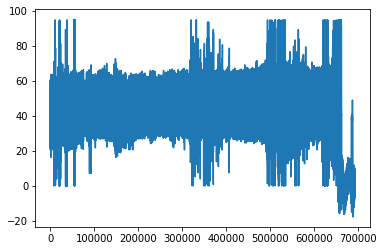

In [53]:
plt.plot(vals)

In [54]:
vals = vitaldb.load_case(1, ['SNUADC/PLETH'], 1/60).flatten() # scale : dt <-> val

dt_signal_5 = (vals[int(dt)-300:int(dt)]) # sequence range
dt_signal_3 = (vals[int(dt)-180:int(dt)]) # sequence range
dt_signal_1 = (vals[int(dt)-60:int(dt)]) # sequence range

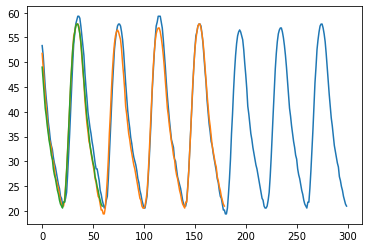

In [57]:
plt.plot(dt_signal_5)
plt.plot(dt_signal_3)
plt.plot(dt_signal_1)

In [72]:
dt_list = []
dt_signal_5 = []
dt_signal_3 = []
dt_signal_1 = []
lb_list = []
id = []
for idx in range(len(id_lb_1000)):
    caseid, dt, label = id_lb_1000.iloc[idx]
    vals = vitaldb.load_case(caseid, ['SNUADC/PLETH'], 1/60).flatten() # scale : dt <-> vals
    if dt < len(vals) and dt > 300: 
        dt_list.append(dt)
        dt_signal_5.append(vals[int(dt)-300:int(dt)]) # sequence range
        dt_signal_3.append(vals[int(dt)-180:int(dt)]) # sequence range
        dt_signal_1.append(vals[int(dt)-60:int(dt)]) # sequence range
        lb_list.append(label)
        id.append(caseid)
    else:
        pass

In [ ]:
np.save('workspace/data/ica_ppg_id', id)

In [ ]:
np.save('workspace/data/ica_ppg_lb', lb_list)

In [ ]:
np.save('workspace/data/ica_ppg_signal_5', dt_signal_5)

In [ ]:
np.save('workspace/data/ica_ppg_signal_3', dt_signal_3)

In [ ]:
np.save('workspace/data/ica_ppg_signal_1', dt_signal_1)

* ecg

In [ ]:
dt_list = []
dt_signal_5 = []
dt_signal_3 = []
dt_signal_1 = []
lb_list = []
id = []
for idx in range(len(id_lb_1000)):
    caseid, dt, label = id_lb_1000.iloc[idx]
    vals = vitaldb.load_case(caseid, ['SNUADC/ECG_II'], 1/60).flatten() # scale : dt <-> vals
    if dt < len(vals) and dt > 300: 
        dt_list.append(dt)
        dt_signal_5.append(vals[int(dt)-300:int(dt)]) # sequence range
        dt_signal_3.append(vals[int(dt)-180:int(dt)]) # sequence range
        dt_signal_1.append(vals[int(dt)-60:int(dt)]) # sequence range
        lb_list.append(label)
        id.append(caseid)
    else:
        pass

In [ ]:
np.save('workspace/data/ica_ecg_id', id)

In [ ]:
np.save('workspace/data/ica_ecg_lb', lb_list)

In [ ]:
np.save('workspace/data/ica_ecg_signal_5', dt_signal_5)

In [ ]:
np.save('workspace/data/ica_ecg_signal_3', dt_signal_3)

In [ ]:
np.save('workspace/data/ica_ecg_signal_1', dt_signal_1)